# NFL dataproject

American football players are tall, big, and earn a lot of money. 

Even if you do not know anything about the American national sport, these statements are probably not too far from your own idea of the sport and its players. 

This paper will examine just how big American football players in the National Football League (NFL) are and how much money they make. Do bigger players make more money? How different are the body types of the players when sorting by positions? Which position suits your body type the best? 

Continue reading to find out. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import ipywidgets as widgets

data = pd.read_csv("spillere.csv")

#Choosing relevant variables
variable = ['name','position','current_salary','weight',"height"]
data=data[variable]

#Removing all data of players with missing heights, weights or salaries
data = data.dropna(subset=["height"])
data=data.dropna(subset=["current_salary"])
data=data.dropna(subset=["weight"])

#Creating function to convert feet-inches to centimeters 
def calcAmericanHeightToCM(x):
    """ This function convert feet-inches to centimeters
    
    Args:
    
        x (float): The input is feet-inches
        
    Returns:
    
        cm (float): Return the height in cm
    
    """
    x = str(x)
    m = x.split("-")
    cm = float(m[0])*30.48 + float(m[1]) * 2.54 
    return(cm)

#Calling the function to convert the height from feet-inches to centimeters
data['height'] = data.height.apply(calcAmericanHeightToCM)

#Removing commas from salaries
data["current_salary"]=data["current_salary"].str.replace(',','') 

#Choosing columns with numeric values
cols = ['current_salary','weight',"height"]  

#Converting columns to numeric values
for col in cols: 
    data[col] = pd.to_numeric(data[col]) 

#Converting weight from pounds to kilos
data["weight"]=data["weight"]*0.45359237 

#Simplifying Positions 
#Linebackers
data["position"]=data["position"].replace({"OLB":"LB","ILB":"LB","LB-DE":"LB"})
#Defensive Backs
data["position"]=data["position"].replace({"S":"DB","CB":"DB","SS":"DB","FS":"DB"})
#Defensive Linemen
data["position"]=data["position"].replace({"DT":"DL","DE":"DL","NT":"DL","DE-C":"DL"})
#Offensive Linemen
data["position"]=data["position"].replace({"G":"OL","T":"OL","OT":"OL","OG":"OL","LS":"OL","LS,TE":"OL","C":"OL"})
#Skill Positions
data["position"]=data["position"].replace({"WR":"SP","RB":"SP","FB":"SP","TE":"SP","WR/RB":"SP"})
#Special Teams
data["position"]=data["position"].replace({"K":"ST","P":"ST"})

The data set we are working with is scraped from nfl.com in April 2017 by Kaggle user zackthoutt and contains player data, dating back to the 1940s. We are only interested in the players currently playing and the variables describing their height, weight, current salary, poisiton, and name.

We convert their weight from pounds to kilos and height from feet-inches to centimeters. 

$ $
$ $
$ $
$ $

Furthermore, we simplify their position into 7 categories: 

#### Offense:

 **Quarterbacks (QB):** The person distributing the ball on offense. Either by throwing the ball to a receiver or by handing it off to a running back.

**Skill Positions (SP):** Containing the athletic positions of wide receivers, running backs, and tight ends who either run or catch the ball from the quarterback. 

**Offensive Linemen (OL):** The big guys up front who protect the quarterback or block for the running back. 

#### Defense:

**Defensive Linemen (DL):** The big guys up front on the defense. They stop the run or attack the quarterback.

**Defensive Backs (DB):** The athletic guys on defense. Covering the receivers to prevent them from catching the ball.

**Linebackers (LB):** Medium sized players. A mix of the defensive linemen and defensive backs. 

#### Special Teams: 

**Special Teams (ST):** The kickers and punters who kick the ball in difference situations.  

$ $
$ $
$ $
$ $

First, we want to see how the pay differs across positions. Notice that a big part of NFL players pay comes from bonuses and not actual salaries which deflates the numbers in this paper.  



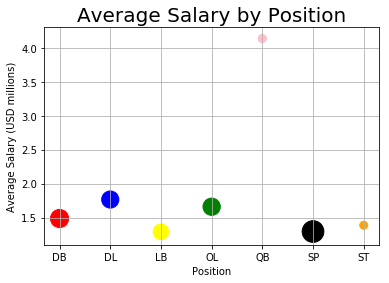

In [2]:
#Calculating average salary by position
loen=data.groupby('position')["current_salary"].mean()
#Creating array with just position names
positioner=data.position.unique()
positioner=sorted(positioner)
#Counting amount of players in each position
tael_positioner=data.groupby('position')["name"].nunique()
#Plot
farver=('red','blue','yellow','green','pink','black','orange')
plt.scatter(positioner, loen/1000000, s=tael_positioner*1,c=farver)
plt.xlabel("Position")
plt.ylabel("Average Salary (USD millions)")
plt.title("Average Salary by Position",fontsize=20)
plt.grid(True)

The quarterback position stands out with an average salary above 4 million dollars a year. As the size of its circle indicates, this position group is very small. Most teams consist of just two quarterbacks: A starting quarterback and a backup quarterback in case of injury. As the quarterback position is the most important on an american football team, it is only natural to see this huge salary compared to other positions.

The average pay of the other positions are all around 1 to 2 millions dollars a year while the group sizes vary a lot. 

Most top players easily make 10 - 20 million dollars a year depending on position but the low average salaries in this graph is due to the huge amount of backup players in the sport. 

$ $
$ $
$ $
$ $

To examine the height and weight of the players, we present the following graph:

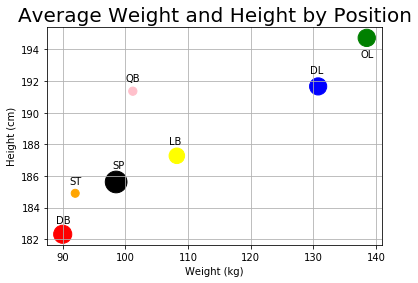

In [3]:
#Calculating average height and weight by position 
hoejde=data.groupby('position')["height"].mean()
vaegt=data.groupby('position')["weight"].mean()

#Plot
plt.scatter(vaegt,hoejde,s=tael_positioner,c=farver)
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.title("Average Weight and Height by Position", fontsize=20)
plt.grid(True)
plt.text(100,192,"QB")
plt.text(89,183,"DB")
plt.text(91,185.5,"ST")
plt.text(98,186.5,"SP")
plt.text(107,188,"LB")
plt.text(129.5,192.5,"DL")
plt.text(137.5,193.5,"OL")
plt.show()

The graph pretty much shows the expected distrubtion of the average height and weight of the different positions. 

The athletic defensive backs and skill position players are the lightest and shortest. But compared to average people "light" would not be fitting. These players are very muscular with an average weight of 90 and 100 kilos with heights just above the male population averages.

In the other end we have the huge defensive and offensive linemen with stunning average weights of 130 and 140 kilos.

In between, we have the linebackers as expected.

The quarterback is the only position standing out being very tall compared to his weight. Quarterbacks need to throw the ball while huge defensive and offensive linemen are around them. Height is a big advantage, allowing the quarterback to maintain vision and to throw the ball. On the other hand, strenght and muscle mass are not as important for a quarterback compared to the rest of the positions.  

$ $
$ $
$ $
$ $

Next, we want to zoom in on a specific position. The tallest and heaviest position is the offensive lineman. You have to be big to play this position but is it an advantage to be big compared to others playing this position. In the next graph we examine if heavier offensive linemen earn more. 

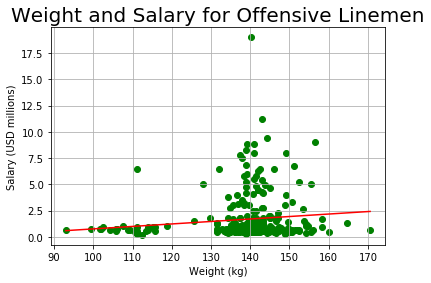

In [4]:
#Creating a dataset only countaining offensive linemen
OLdata=data.copy()
OLdata=OLdata.loc[data["position"]=="OL"]
OLdata.loc[:,"current_salary"]=OLdata["current_salary"]/1000000

#Plot 
plt.scatter(OLdata["weight"],OLdata["current_salary"],c="green")
plt.xlabel("Weight (kg)")
plt.ylabel("Salary (USD millions)")
plt.title("Weight and Salary for Offensive Linemen",fontsize=20)
plt.grid(True)

#Adding trend line 
plt.plot(np.unique(OLdata["weight"]), np.poly1d(np.polyfit(OLdata["weight"], OLdata["current_salary"], 1))(np.unique(OLdata["weight"])),c="red")
plt.show()

The data shows that heavier linemen on average earn more than lighter linemen. We cannot be sure that this is entirely because of the weight itself and not other factors. As we have multiple positions included in the "offensive linemen" group this could also be an effect of a heavier position that on average earn more which bias the results. We will not go further into that. 

$ $
$ $
$ $
$ $

To see if this added trendline actually shows a significant increase in pay by weight we make a simple OLS-regression: 

$$Salary = \beta_{0} + \beta_{1}\cdot Weight + \epsilon$$ 

In [5]:
#Assigning dependent variable Y to salary and explanatory variable X to weight and adding constant
Y = np.array(OLdata["current_salary"])
X = np.array(OLdata["weight"])
X = sm.add_constant(X)

#Estimating OLS
results = sm.OLS(Y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     4.252
Date:                Tue, 30 Apr 2019   Prob (F-statistic):             0.0401
Time:                        15:28:49   Log-Likelihood:                -657.00
No. Observations:                 299   AIC:                             1318.
Df Residuals:                     297   BIC:                             1325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6061      1.589     -1.011      0.3

Weight has a positive and significant effect on salary. An 1 kilo increase in weight increases salary by 23,600 dollars a year on average.

$ $
$ $
$ $
$ $

If you should play american football and you should earn these kind of money which position would suit you the best? Try out the interactive graph below and put in your weight and your height to see where you fit among the american football positions described in this paper.

In [6]:
#Defining function to make the known graph of weight and height averages but with an added scatterpoint ("you")
def punkt(b,c):
    
    plt.scatter(c,b,s=100)
    plt.text(c+1,b,"You")
    
    plt.scatter(vaegt,hoejde,s=tael_positioner,c=farver)
    plt.xlabel("Weight (kg)")
    plt.ylabel("Height (cm)")
    plt.title("Average Weight and Height by Position", fontsize=20)
    plt.grid(True)
    plt.text(100,192,"QB")
    plt.text(89,183,"DB")
    plt.text(91,185.5,"ST")
    plt.text(98,186.5,"SP")
    plt.text(107,188,"LB")
    plt.text(129.5,192.5,"DL")
    plt.text(137.5,193.5,"OL")
    
#Making a widget to change the point "you" in the graph. The point changes as weight and height changes.  
import ipywidgets as widgets
widgets.interact(punkt,
    X=widgets.fixed(X),
    b=widgets.FloatSlider(description="Height", min=140, max=220, step=1, value=180),
    c=widgets.FloatSlider(description="Weight", min=40, max=200, step=1, value=75)
    );

interactive(children=(FloatSlider(value=180.0, description='Height', max=220.0, min=140.0, step=1.0), FloatSli…